In [2]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install pyproj==1.9.6
!pip install https://github.com/matplotlib/basemap/archive/v1.2.0rel.tar.gz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 9.4 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp38-cp38-linux_x86_64.whl size=3724280 sha256=64cad6866e997bd81a4d3567879c7d1c1262e4d50cf49f114065961c1fdce8eb
  Stored in directory: /root/.cache/pip/wheel

In [3]:
# data manipulation
import pandas as pd
import numpy as np
import time
import math
import warnings

# plots
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo
from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins
from mpl_toolkits.basemap import Basemap

#graph section
import networkx as nx
import heapq  # for getting top n number of things from list,dict

#settings
start_time=time.time()
color = sns.color_palette("Spectral",10)
sns.set_style("white")
warnings.filterwarnings("ignore")
pyo.init_notebook_mode()

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
yelprest = pd.read_csv("/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/less_close_label/non_text_feature.csv")
pd.set_option('display.max_columns', None)
display(yelprest.head())
display(yelprest.describe().T)
display(yelprest.info())
print("\n SHape of the dataset:", yelprest.shape)

,business_id,stars,review_count,is_chain,cat_Pizza,cat_Mexican,cat_Chinese,cat_Italian,cat_American (Traditional),cat_Thai,cat_Vietnamese,cat_Indian,cat_Breakfast & Brunch,cat_FastFood,user_count,checkin_count,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsDelivery,GoodForKids,OutdoorSeating,RestaurantsAttire,HasTV,BikeParking,Alcohol,WiFi,NoiseLevel,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_touristy,Ambience_trendy,Ambience_casual,Ambience_upscale,Ambience_hipster,Ambience_divey,per capita personal income (dollars),is_open2020
0,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,0,0,0,1,0,0,0,0,0,0,0,5.0,455.0,1.0,2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37400,1.0
1,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,0,0,0,0,0,0,0,0,0,0,0,7.0,721.0,1.0,2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60804,1.0
2,1Dfx3zM-rW4n-31KeC8sJg,3.0,18,1,0,1,0,0,0,0,0,0,1,1,1.0,90.0,1.0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47606,1.0
3,fweCYi8FmbJXHCqLnwuk8w,4.0,16,1,1,0,0,1,0,0,0,0,0,0,2.0,5.0,1.0,2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69949,1.0
4,1RHY4K3BD22FK7Cfftn8Mg,4.0,35,0,0,0,0,0,0,0,0,0,0,1,2.0,21.0,1.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63371,1.0


,count,mean,std,min,25%,50%,75%,max
stars,29678.0,3.458505,0.818094,1.0,3.0,3.5,4.0,5.0
review_count,29678.0,82.150785,203.838474,3.0,9.0,26.0,78.0,8348.0
is_chain,29678.0,0.322023,0.467260,0.0,0.0,0.0,1.0,1.0
cat_Pizza,29678.0,0.124267,0.329892,0.0,0.0,0.0,0.0,1.0
cat_Mexican,29678.0,0.080430,0.271962,0.0,0.0,0.0,0.0,1.0
cat_Chinese,29678.0,0.075275,0.263838,0.0,0.0,0.0,0.0,1.0
cat_Italian,29678.0,0.075443,0.264109,0.0,0.0,0.0,0.0,1.0
cat_American (Traditional),29678.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
cat_Thai,29678.0,0.023148,0.150377,0.0,0.0,0.0,0.0,1.0
cat_Vietnamese,29678.0,0.020992,0.143360,0.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29678 entries, 0 to 29677
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   business_id                           29678 non-null  object 
 1   stars                                 29678 non-null  float64
 2   review_count                          29678 non-null  int64  
 3   is_chain                              29678 non-null  int64  
 4   cat_Pizza                             29678 non-null  int64  
 5   cat_Mexican                           29678 non-null  int64  
 6   cat_Chinese                           29678 non-null  int64  
 7   cat_Italian                           29678 non-null  int64  
 8   cat_American (Traditional)            29678 non-null  int64  
 9   cat_Thai                              29678 non-null  int64  
 10  cat_Vietnamese                        29678 non-null  int64  
 11  cat_Indian     

None


 SHape of the dataset: (29678, 45)


In [6]:
 latlong = pd.read_csv('/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/less_close_label/2018_yelp_business_with_2020_label(cleaned).csv')
 latlong = latlong[['business_id','name','state',"latitude","longitude"]]
 latlong

,business_id,name,state,latitude,longitude
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,ON,43.605499,-79.652289
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,NC,35.092564,-80.859132
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,AZ,33.495194,-112.028588
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,OH,41.708520,-81.359556
4,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,PA,40.496177,-80.246011
...,...,...,...,...,...
29673,Wyc49dq1r5uMqBl9bHVPAw,Church's Chicken,NV,36.115214,-115.069188
29674,5xX1Eb4fBoUr53OJkgRHRQ,Sofia's Pizza,NV,36.087212,-115.119135
29675,RckeGBEPQpGv00ivf6tcgw,Cozy Corner Cafe,AZ,33.450360,-111.704131
29676,AE80fzfVnsyeHiiVhwSGMw,Deluxburger Express,AZ,33.437361,-112.001836


In [7]:
yelprest = yelprest.merge(latlong, on='business_id', how='left')
yelprest

,business_id,stars,review_count,is_chain,cat_Pizza,cat_Mexican,cat_Chinese,cat_Italian,cat_American (Traditional),cat_Thai,cat_Vietnamese,cat_Indian,cat_Breakfast & Brunch,cat_FastFood,user_count,checkin_count,RestaurantsTakeOut,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsDelivery,GoodForKids,OutdoorSeating,RestaurantsAttire,HasTV,BikeParking,Alcohol,WiFi,NoiseLevel,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_touristy,Ambience_trendy,Ambience_casual,Ambience_upscale,Ambience_hipster,Ambience_divey,per capita personal income (dollars),is_open2020,name,state,latitude,longitude
0,QXAEGFB4oINsVuTFxEYKFQ,2.5,128,0,0,0,1,0,0,0,0,0,0,0,5.0,455.0,1.0,2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,37400,1.0,Emerald Chinese Restaurant,ON,43.605499,-79.652289
1,gnKjwL_1w79qoiV3IC_xQQ,4.0,170,0,0,0,0,0,0,0,0,0,0,0,7.0,721.0,1.0,2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60804,1.0,Musashi Japanese Restaurant,NC,35.092564,-80.859132
2,1Dfx3zM-rW4n-31KeC8sJg,3.0,18,1,0,1,0,0,0,0,0,0,1,1,1.0,90.0,1.0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47606,1.0,Taco Bell,AZ,33.495194,-112.028588
3,fweCYi8FmbJXHCqLnwuk8w,4.0,16,1,1,0,0,1,0,0,0,0,0,0,2.0,5.0,1.0,2,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69949,1.0,Marco's Pizza,OH,41.708520,-81.359556
4,1RHY4K3BD22FK7Cfftn8Mg,4.0,35,0,0,0,0,0,0,0,0,0,0,1,2.0,21.0,1.0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63371,1.0,Marathon Diner,PA,40.496177,-80.246011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29673,Wyc49dq1r5uMqBl9bHVPAw,2.5,24,1,0,0,0,0,0,0,0,0,1,1,0.0,51.0,1.0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,35696,1.0,Church's Chicken,NV,36.115214,-115.069188
29674,5xX1Eb4fBoUr53OJkgRHRQ,2.0,121,0,1,0,0,0,0,0,0,0,0,1,3.0,30.0,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35696,1.0,Sofia's Pizza,NV,36.087212,-115.119135
29675,RckeGBEPQpGv00ivf6tcgw,4.5,195,0,0,0,0,0,0,0,0,0,1,0,5.0,469.0,1.0,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47606,1.0,Cozy Corner Cafe,AZ,33.450360,-111.704131
29676,AE80fzfVnsyeHiiVhwSGMw,2.5,93,0,0,0,0,0,0,0,0,0,0,1,0.0,169.0,1.0,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,47606,1.0,Deluxburger Express,AZ,33.437361,-112.001836


# Location Distribution

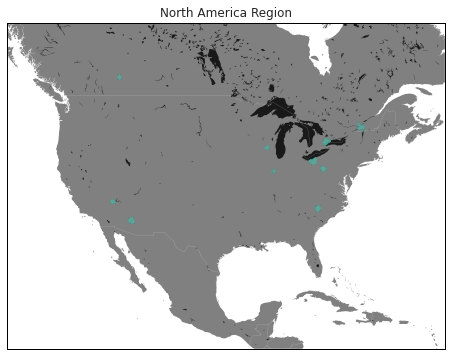

In [8]:
# Sample it down to only the North America region 
lon_min, lon_max = -132.714844, -59.589844
lat_min, lat_max = 13.976715,56.395664

#create the selector
idx_NA = (yelprest["longitude"]>lon_min) &\
            (yelprest["longitude"]<lon_max) &\
            (yelprest["latitude"]>lat_min) &\
            (yelprest["latitude"]<lat_max)
#apply the selector to subset
NA_business=yelprest[idx_NA]

#initiate the figure
plt.figure(figsize=(12,6))
m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='gray',lake_color='#191919') # dark grey land, black lakes
m2.drawmapboundary()                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(NA_business["longitude"].tolist(), NA_business["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c=color[8], lw=0, alpha=0.05, zorder=5)

plt.title("North America Region")
plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/EDA/1.png",format="png",bbox_inches="tight")

In [9]:
statecnt = yelprest['state'].value_counts().to_frame()
statecnt = statecnt.rename(columns={'state': '# of Business'})
statecnt

,# of Business
ON,7406
AZ,5403
NV,3612
QC,3060
OH,2981
NC,2199
PA,2081
AB,1601
WI,821
IL,323


In [10]:
statecnt['state'] = ['Ontario','Arizona','Nevada','Quebec','Ohio','North Carolina','Pennsylvania','Alberta','Wisconsin','Illinois','South Carolina','New York']
statecnt.iloc[:,[1,0]]

,state,# of Business
ON,Ontario,7406
AZ,Arizona,5403
NV,Nevada,3612
QC,Quebec,3060
OH,Ohio,2981
NC,North Carolina,2199
PA,Pennsylvania,2081
AB,Alberta,1601
WI,Wisconsin,821
IL,Illinois,323


# Median Annual Family Income

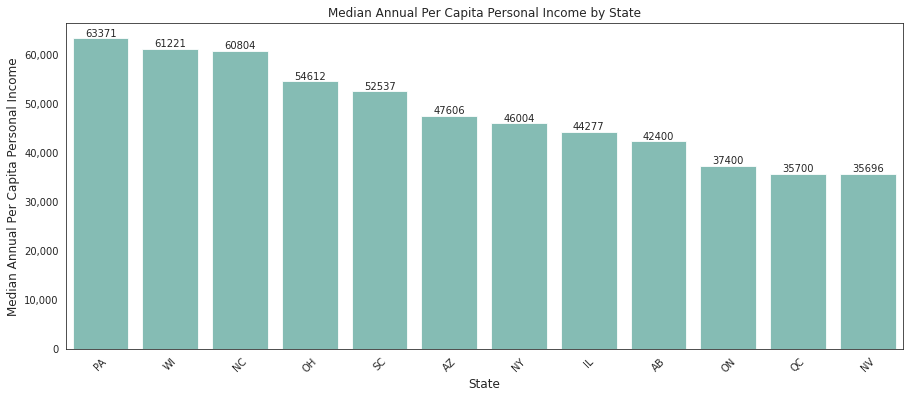

In [11]:
#Get the median distribution of the per capita personal income
income = yelprest.groupby('state')['per capita personal income (dollars)'].median().sort_values(ascending=False).to_frame()
income['per capita personal income (dollars)'] = income['per capita personal income (dollars)'].astype(int)
plt.figure(figsize=(15,6))
ax = sns.barplot(income.index, income['per capita personal income (dollars)'], alpha=0.8,color=color[8])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Median Annual Per Capita Personal Income by State")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Median Annual Per Capita Personal Income', fontsize=12)
plt.xlabel('State', fontsize=12)

#adding the text labels
rects = ax.patches
labels = income['per capita personal income (dollars)']
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/EDA/2.png",format="png",bbox_inches="tight")
plt.show()



#  Ratings Distribution



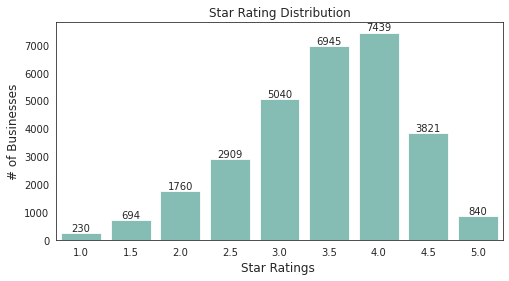

In [12]:
#Get the distribution of the ratings
x=yelprest['stars'].value_counts()
x=x.sort_index()

#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8, color=color[8])
plt.title("Star Rating Distribution")
plt.ylabel('# of Businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/EDA/3.png",format="png",bbox_inches="tight")

# Review and Checkin Count

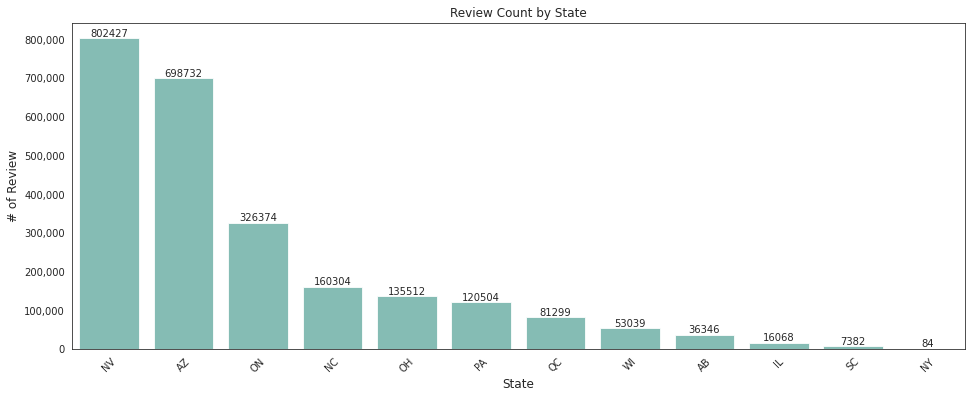

In [13]:
#Get the distribution of the reviews
revcnt = yelprest.groupby('state')['review_count'].sum().sort_values(ascending=False).to_frame()
plt.figure(figsize=(16,6))
ax = sns.barplot(revcnt.index, revcnt.review_count, alpha=0.8,color=color[8])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Review Count by State")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# of Review', fontsize=12)
plt.xlabel('State', fontsize=12)

#adding the text labels
rects = ax.patches
labels = revcnt.review_count
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/EDA/4.png",format="png",bbox_inches="tight")
plt.show()

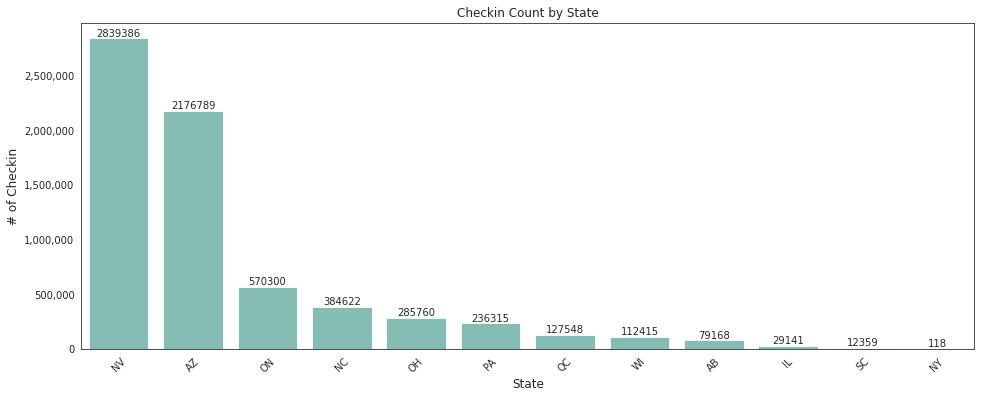

In [14]:
#Get the distribution of the checkins
chkcnt = yelprest.groupby('state')['checkin_count'].sum().sort_values(ascending=False).to_frame()
chkcnt['checkin_count'] = chkcnt['checkin_count'].astype(int)
plt.figure(figsize=(16,6))
ax = sns.barplot(chkcnt.index, chkcnt.checkin_count, alpha=0.8,color=color[8])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Checkin Count by State")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# of Checkin', fontsize=12)
plt.xlabel('State', fontsize=12)

#adding the text labels
rects = ax.patches
labels = chkcnt.checkin_count
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/EDA/5.png",format="png",bbox_inches="tight")
plt.show()

# Chain Restaurant

In [15]:
# filter restaurant which appear more than one time
chain = yelprest.groupby('name').filter(lambda x: len(x)>1)
chain = chain[['name']]
chain

,name
2,Taco Bell
3,Marco's Pizza
9,Buk Chang Dong Soon Tofu
16,Burrito Bandidos
19,Carl's Jr
...,...
29667,McDonald's
29668,Panagio's All Day Grill
29673,Church's Chicken
29674,Sofia's Pizza


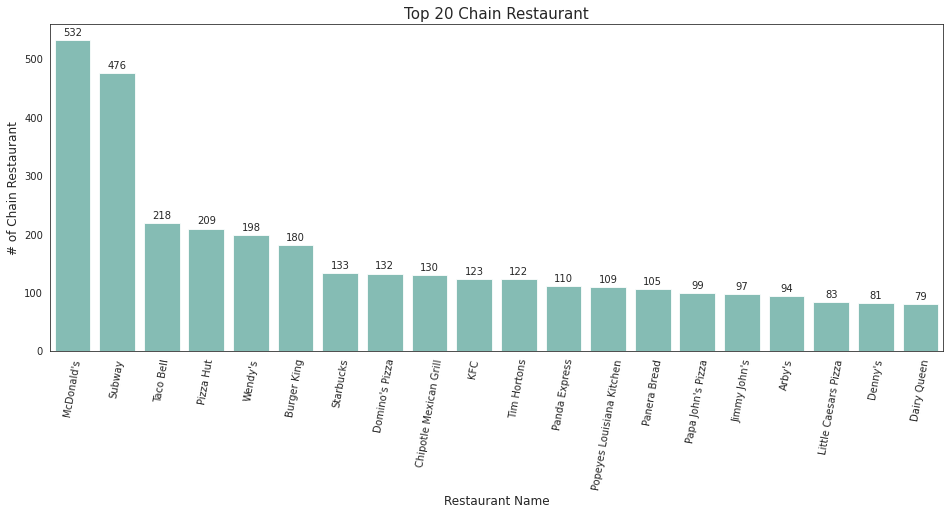

In [16]:
#Get the distribution of the categories
x=chain.name.value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,6))
ax = sns.barplot(x.index, x.values, alpha=0.8, color=color[8])
plt.title("Top 20 Chain Restaurant",fontsize=15)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# of Chain Restaurant', fontsize=12)
plt.xlabel('Restaurant Name', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/EDA/6.png",format="png",bbox_inches="tight")
plt.show()

# Return Guest Count

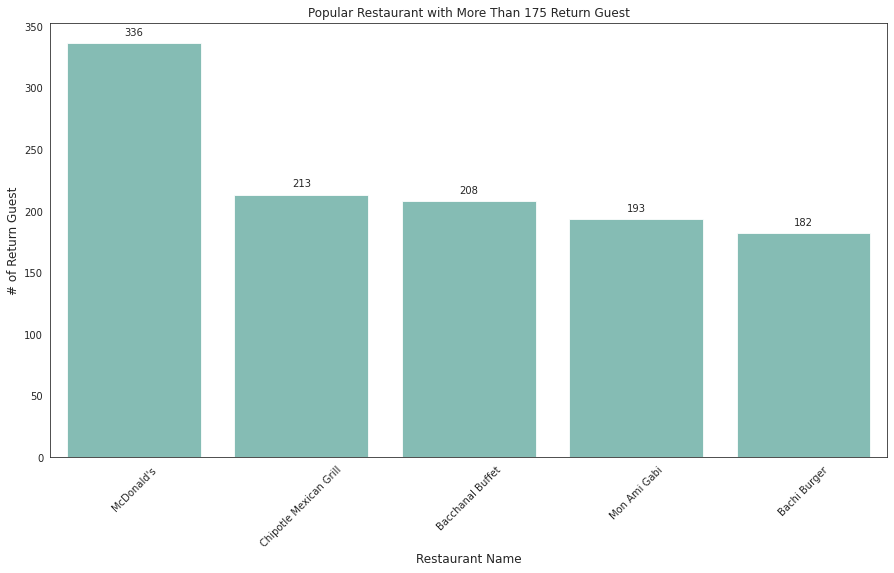

In [27]:
#Get the distribution of the popular restaurant with more than 175 return guest
rtnguest = yelprest.groupby('name')['user_count'].sum().sort_values(ascending=False).to_frame()
rtnguest = rtnguest[rtnguest['user_count']>=175]
rtnguest['user_count'] = rtnguest['user_count'].astype(int)
plt.figure(figsize=(15,8))
ax = sns.barplot(rtnguest.index, rtnguest.user_count, alpha=0.8,color=color[8])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Popular Restaurant with More Than 175 Return Guest")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# of Return Guest', fontsize=12)
plt.xlabel('Restaurant Name', fontsize=12)

#adding the text labels
rects = ax.patches
labels = rtnguest.user_count
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/EDA/7.png",format="png",bbox_inches="tight")
plt.show()

# Popular Restaurant Categories

In [18]:
cats = pd.read_csv("/content/drive/MyDrive/SEAS 6402 Project/Data/CSV/less_close_label/2018_yelp_business_with_2020_label(cleaned).csv")

In [19]:
restcats = yelprest.merge(cats, how='left', on='business_id')
restcats = restcats[['business_id','categories']]

In [20]:
restcats.head()

,business_id,categories
0,QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported..."
1,gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese"
2,1Dfx3zM-rW4n-31KeC8sJg,"Restaurants, Breakfast & Brunch, Mexican, Taco..."
3,fweCYi8FmbJXHCqLnwuk8w,"Italian, Restaurants, Pizza, Chicken Wings"
4,1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo..."


In [21]:
restcats['categories'] = restcats['categories'].str.replace(' ','')
restcats['categories'] = restcats['categories'].str.replace(',','')
restcats['categories'] = restcats['categories'].str.replace('Restaurants','')
x=restcats.categories.value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

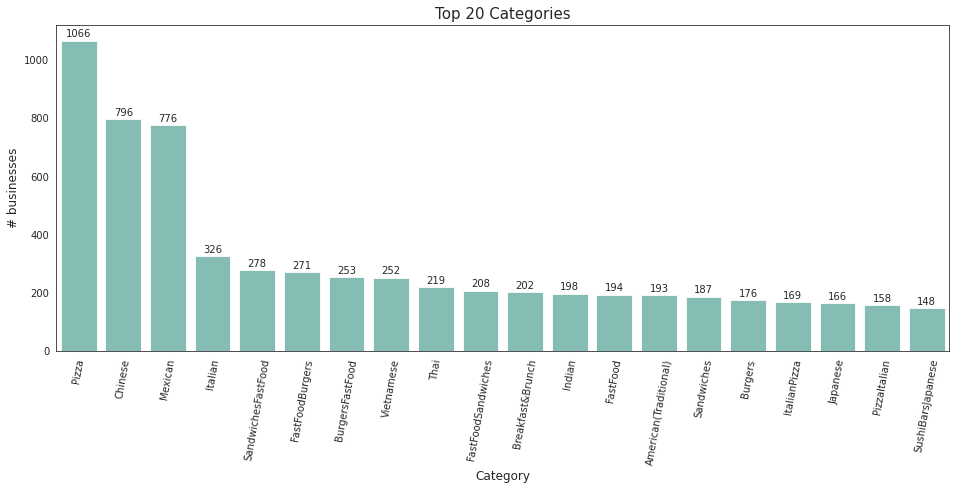

In [22]:
#Get the distribution of the categories
plt.figure(figsize=(16,6))
ax = sns.barplot(x.index, x.values, alpha=0.8, color=color[8])
plt.title("Top 20 Categories",fontsize=15)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("/content/drive/MyDrive/SEAS 6402 Project/Image/EDA/8.png",format="png",bbox_inches="tight")
plt.show()